# Algorithm & Metric Deep Dive - Making appropriate choices for your problem

## Overview 

In the previous notebook, we built a machine learning pipeline containing all the important elements we would find in any sophisticated, real world pipeline, but in our example we used quite simple components for each step. Even still, there were quite a number of *hyperparameters* we had to choose along the way, without having understood what we were choosing and why, or more importantly, understanding what would be a good choice for our particular problem and the dataset. This notebook will attempt to give a little insight into how key ML algorithms work with the aim of giving some basic understanding of what the hyperparameters mean and how they influence the end result. This will hopefully be a starting point for making appropriate choices of algorithm, hyperparameters and metrics. 


### Prerequisites
* Completed notebooks 1 & 2

### Learning Outcomes 

* Understand mechanisms of key tree based and neural network algorithms
* Understand key hyperparameters and how to choose them
* Understand key metrics and how to select the right one for your problem

### Links to Best practices and Values
* ML Pitfalls - Avoid problems such as overfitting and underfitting through appropriate choice of algorithms and hyperparameters
* Ethics - Be able to justify your choices for what you have implemented
* ML Lifecycle - Ensure you are able to reproduce results

(Please see [Met Office Best Prctice Summary document](https://metoffice.sharepoint.com/:w:/r/sites/MetOfficeDataScienceCommunity/Shared%20Documents/MLAG/project_evaluation_review/MachineLearningBestPracticesAndValues_v1_0.docx?d=wae2554217d0342f2a9c8cf8906bfbe38&csf=1&web=1&e=ja7rLn) on Data Science Community site (internal only) for more information and further reading.)


### Data Science Framework
* Radiation emulation - Fusing Simulation and Data Science
* XBT - Uncertainty and Trust
* Rotors - Data to Decisions
* Weather regimes - Discovery and Attribution

Further Reading
* [Data Science Framework](https://www.metoffice.gov.uk/research/foundation/informatics-lab/met-office-data-science-framework)


## Tutorial - Decision Trees

The first algorithm we will look at in detail is the family of algorithms based on decision trees. A decision tree is basically a flow chart where at each node a question is asked of the data and you proceed along one branch until you run out of nodes, you are then presented with an answer for the end point in the flowchart that you have reached. Below we have an example of such a "manually created" decision tree, where expert judgement has informed the questions of the data. In this case, metadata around a set of ocean observations is being queried, to be able to infer what sort of probe was used to make the measurement. So a question being asked in the flowchart is "Was the measurement made by a certain set of countries" or "Was the maximum depth of the measurement within one of several specified range"? Following the flowchart to the end we get an answer about which type of probe the expert thinks that measurement has come from. In decision trees, a training algorithm constructs such a series of questions from the data.

![An example of manually created flowchart for making decisions, similar to the structure of the decision tree.](xbt_imeta_flowchart.png)

To start with lets explain some key terminology for decision trees:
* *Root node* - The base node of the decision tree.
* *Splitting* - The process of dividing a node into multiple sub-nodes.
* *Decision node* - When a sub-node is further split into additional sub-nodes.
* *Leaf node* - When a sub-node does not further split into additional sub-nodes; represents possible outcomes.
* *Pruning* - The process of removing sub-nodes of a decision tree.
* *Branch* - A subsection of the decision tree consisting of multiple nodes.
* *Hyperparameters*
  * *Max depth* -  The maximum number of levels in the tree, i.e. the maximum number of decision nodes before an answer is reached.
  * *Minimum leaf node samples* - The minimum number of data samples in the training dataset that can be assigned to a leaf node, if splitting would result in fewer data points for the leaf node, then splitting will not occur.
  * **
![Image of tree](https://miro.medium.com/max/1400/1*3P1333UmqEww6YMpjisj4Q.png)

(from article https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6 )

### Training a decision tree

The decision tree is constructed with an algorithm that recursively splits nodes based on a criteria until some or other constraints are reached, such as max depth or min leaf sample hyperparameters. In the decision tree, the nodes are split into sub-nodes on the basis of a threshold value of an attribute, considering one node and one attribute at a time. ([Source of quote](https://www.analyticssteps.com/blogs/classification-and-regression-tree-cart-algorithm) )

The procedure is approximately as follows

* Start with all training data points in the root node, which is also a leaf node to begin with.
* Go through current leaf nodes considering  whether to split into a decision node and 2 leaf nodes.
* At each leaf node, consider each of the features in turn e.g. year, max depth, country
* For categorical features, consider each of the potential values. 
* For continuous variable, find an appropriate threshold value on which to split the data
* Calculate the value of the information metric for each potential split e.g. entropy, Gini Index. 
* The node split that provides the biggest increase or decrease (depending on the specific metric) in the value at that node is chosen as the branching criteria for a new decision node to replace the leaf node. The CART algorithm does that by searching for the best homogeneity for the sub-nodes, with the help of the Gini Index criterion. 
* The data points at this leaf node are divided between two new leaf nodes, for one of the outcomes of the decision criteria (e.g. max_depth < 400m or max depth >=- 400m).
* move onto next available leaf node until constrain has been reached.

More information on the details of the Maths behind training a decision tree is are available here: [Maths of CART algorithm](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3)

Key training terms
* Greedy algorithm -  an algorithm that consider leaf nodes one at a time, rather than optimising globally.
* Stopping criteria - The criteria for stopping the recursive splitting of nodes, for example max tree depth
* Pruning - A complimentary process of cutting off branches of the decision to simplify it. Sophisticated algorithms can cycle between splitting and pruning operations.

### Pros and Cons of Decision Trees

Advantages:
* Works for numerical or categorical data and variables.
* Models problems with multiple outputs.
* Requires less data cleaning than other data modeling techniques. 
* Easy to explain to those without an analytical background. 

Disadvantages: 
* Affected by noise in the data.
* Not ideal for large datasets.
* Can disproportionately value, or weigh, attributes.
* The decisions at nodes are limited to binary outcomes, reducing the complexity that the tree can handle. Trees can become very complex when dealing with uncertainty and numerous linked outcomes. 


### Variations on a decision tree

While standard decision trees are efficient and powerful tools, as noted above the do have limitations and flaws. Variations on these have been developed to overcome some of these limitations.

* *Random Forests* are ensembles of decision trees where each tree in the forest is trained on different subset of the data (bootstrapping) and subset of the features (bagging). In a classification problem, each tree votes for a classification and the result is the one with the most votes.
* *Gradient boosted trees* use a more complicated method for joining together the output of the ensemble of decision trees, explicitly modeling a loss function and the gradient of the loss function. The gradient boosting is applied to this function, together with the random selection of input data and features used in random forests. For more info on the technical details, please see the links below.
* Xgboost - Standing for eXtreme-Gradient-boosted trees,  this is the current state of the art in ensemble tree-based methods.
Random forest discussion 
Deals with variance Leo breiman
Key terms
* Bagging - Selecting a subset of the input features for training each decision tree in an ensemble.
* Bootstrapping - Selecting a random subset of the data points to separately train each decision tree in an ensemble.
* Aggregation - Bringing together the results of an ensemble to produce a single classification or regression output/ result.
* Ensemble model - A model that joins many lower-performance models together to achieve better performance of the ensemble. This can also be used to determine probabilistic  (or pseudo-probabilistic) information from the ensemble of classifiers.








# Example: Decision Trees - XBT classification

In [1]:
import pathlib
import os
import functools
import math
import datetime

In [2]:
import pandas
import numpy

In [3]:
import matplotlib
import matplotlib.pyplot
%matplotlib inline

In [4]:
import sklearn
import sklearn.tree
import sklearn.preprocessing
import sklearn.ensemble

In [5]:
xbt_data_loc = pathlib.Path('/project/informatics_lab/xbt')
xbt_fname_template = 'xbt_{year}.csv'
year_range= (1966,2015)
xbt_df = pandas.concat([pandas.read_csv(xbt_data_loc / xbt_fname_template.format(year=year1)) for year1 in range(year_range[0], year_range[1])])
xbt_df

,Unnamed: 0,country,lat,lon,date,year,month,day,institute,platform,cruise_number,instrument,model,manufacturer,max_depth,imeta_applied,id
0,0,UNITED STATES,32.966667,-117.633331,19660412,1966,4,12,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.892670,1,2052528
1,1,UNITED STATES,33.016666,-118.116669,19660413,1966,4,13,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.852051,1,2052529
2,2,UNITED STATES,33.066666,-118.466667,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,70.602089,1,2052530
3,3,UNITED STATES,32.700001,-118.666664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.907410,1,2052531
4,4,UNITED STATES,32.933334,-117.916664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.811493,1,2052532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18995,UNITED STATES,-58.394001,-63.181000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,899.722412,0,16686048
18996,18996,UNITED STATES,-58.500999,-63.125000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,929.809082,0,16686049
18997,18997,UNITED STATES,-58.598000,-63.064999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,908.195984,0,16686051
18998,18998,UNITED STATES,-58.681999,-63.015999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,914.778015,0,16686052


#### Clean dataset
Remove bad data points from the dataset.

In [6]:
xbt_df = xbt_df[~((xbt_df['max_depth'] < 0) | (xbt_df['max_depth'].isna()))]
xbt_df

,Unnamed: 0,country,lat,lon,date,year,month,day,institute,platform,cruise_number,instrument,model,manufacturer,max_depth,imeta_applied,id
0,0,UNITED STATES,32.966667,-117.633331,19660412,1966,4,12,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.892670,1,2052528
1,1,UNITED STATES,33.016666,-118.116669,19660413,1966,4,13,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.852051,1,2052529
2,2,UNITED STATES,33.066666,-118.466667,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,70.602089,1,2052530
3,3,UNITED STATES,32.700001,-118.666664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.907410,1,2052531
4,4,UNITED STATES,32.933334,-117.916664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,KEARSARGE,US044120,XBT: T4 (SIPPICAN),T4,SIPPICAN,466.811493,1,2052532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18995,18995,UNITED STATES,-58.394001,-63.181000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,899.722412,0,16686048
18996,18996,UNITED STATES,-58.500999,-63.125000,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,929.809082,0,16686049
18997,18997,UNITED STATES,-58.598000,-63.064999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,908.195984,0,16686051
18998,18998,UNITED STATES,-58.681999,-63.015999,20141231,2014,12,31,0,LAURENCE M. GOULD (R/V; call sign WCX7445; bui...,US036605,XBT: DEEP BLUE (SIPPICAN),DEEP BLUE,SIPPICAN,914.778015,0,16686052


In [7]:
target_feature = 'instrument'

In [8]:
xbt_df[target_feature].value_counts().index[:12]

Index(['XBT: T4 (SIPPICAN)', 'XBT: T7 (SIPPICAN)', 'XBT: DEEP BLUE (SIPPICAN)',
       'XBT: T4 (TSK - TSURUMI SEIKI Co.)', 'XBT: T10 (SIPPICAN)',
       'XBT: T6 (TSK - TSURUMI SEIKI Co.)', 'XBT: T7 (UNKNOWN BRAND)',
       'XBT: T7 (TSK - TSURUMI SEIKI Co.)', 'XBT: T4 (UNKNOWN BRAND)',
       'XBT: T5 (SIPPICAN)', 'XBT: T6 (SIPPICAN)',
       'XBT: T5 (TSK - TSURUMI SEIKI Co.)'],
      dtype='object')

In [9]:
xbt_df = xbt_df[~(xbt_df[target_feature].str.contains('UNKNOWN'))]
xbt_df.shape

(2157559, 17)

In [10]:
xbt_df = xbt_df[xbt_df[target_feature].isin(list(xbt_df[target_feature].value_counts().index[:12]))]

In [11]:
xbt_labelled = xbt_df[xbt_df['imeta_applied'] == 0]
xbt_unlabelled = xbt_df[xbt_df['imeta_applied'] != 0]

<AxesSubplot:ylabel='instrument'>

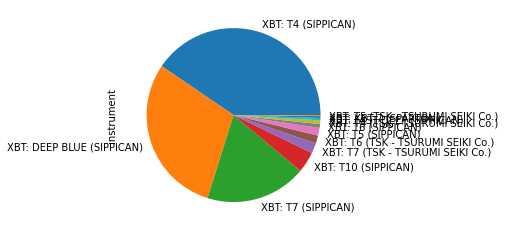

In [12]:
xbt_labelled['instrument'].value_counts().plot.pie()

In [13]:
xbt_labelled.shape

(1119188, 17)

In [14]:
xbt_unlabelled.shape

(1034887, 17)

In [15]:
xbt_train, xbt_test = sklearn.model_selection.train_test_split(xbt_labelled)

In [16]:
scaler_dict = {
    'year': sklearn.preprocessing.MinMaxScaler(),
    'max_depth': sklearn.preprocessing.MinMaxScaler(),
    'lat': sklearn.preprocessing.MinMaxScaler(),
    'lon': sklearn.preprocessing.MinMaxScaler(),
}
input_features = [list(scaler_dict.keys())]

preproc_input_features = []
for feature_name, scaler1 in scaler_dict.items():
    scaler1.fit(xbt_train[[feature_name]])
    preproc_input_features += [scaler1.transform(xbt_train[[feature_name]])]
    
X_train = numpy.concatenate( preproc_input_features, axis=1)



In [17]:
target_encoder = sklearn.preprocessing.LabelEncoder()
target_encoder.fit(xbt_train[target_feature])
y_train = target_encoder.transform(xbt_train[target_feature])

We can get the hyperparameters for our decision tree by creating a decision tree object. You can get more explanation from `help(sklearn.tree.DecisionTreeClassifier`, or from the [scikit-learn docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

In [18]:
sklearn.tree.DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [19]:
%%time
dt_clf = sklearn.tree.DecisionTreeClassifier(
    max_depth=5, # reduce chance of overfitting
    min_samples_leaf= 2, #ensure that there won't be too small a number of samples in a leaf node
    min_samples_split= 5, # ensure more sample at a node when it splits
)
dt_clf.fit(X_train, y_train)

CPU times: user 2.56 s, sys: 26.3 ms, total: 2.59 s
Wall time: 2.59 s


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

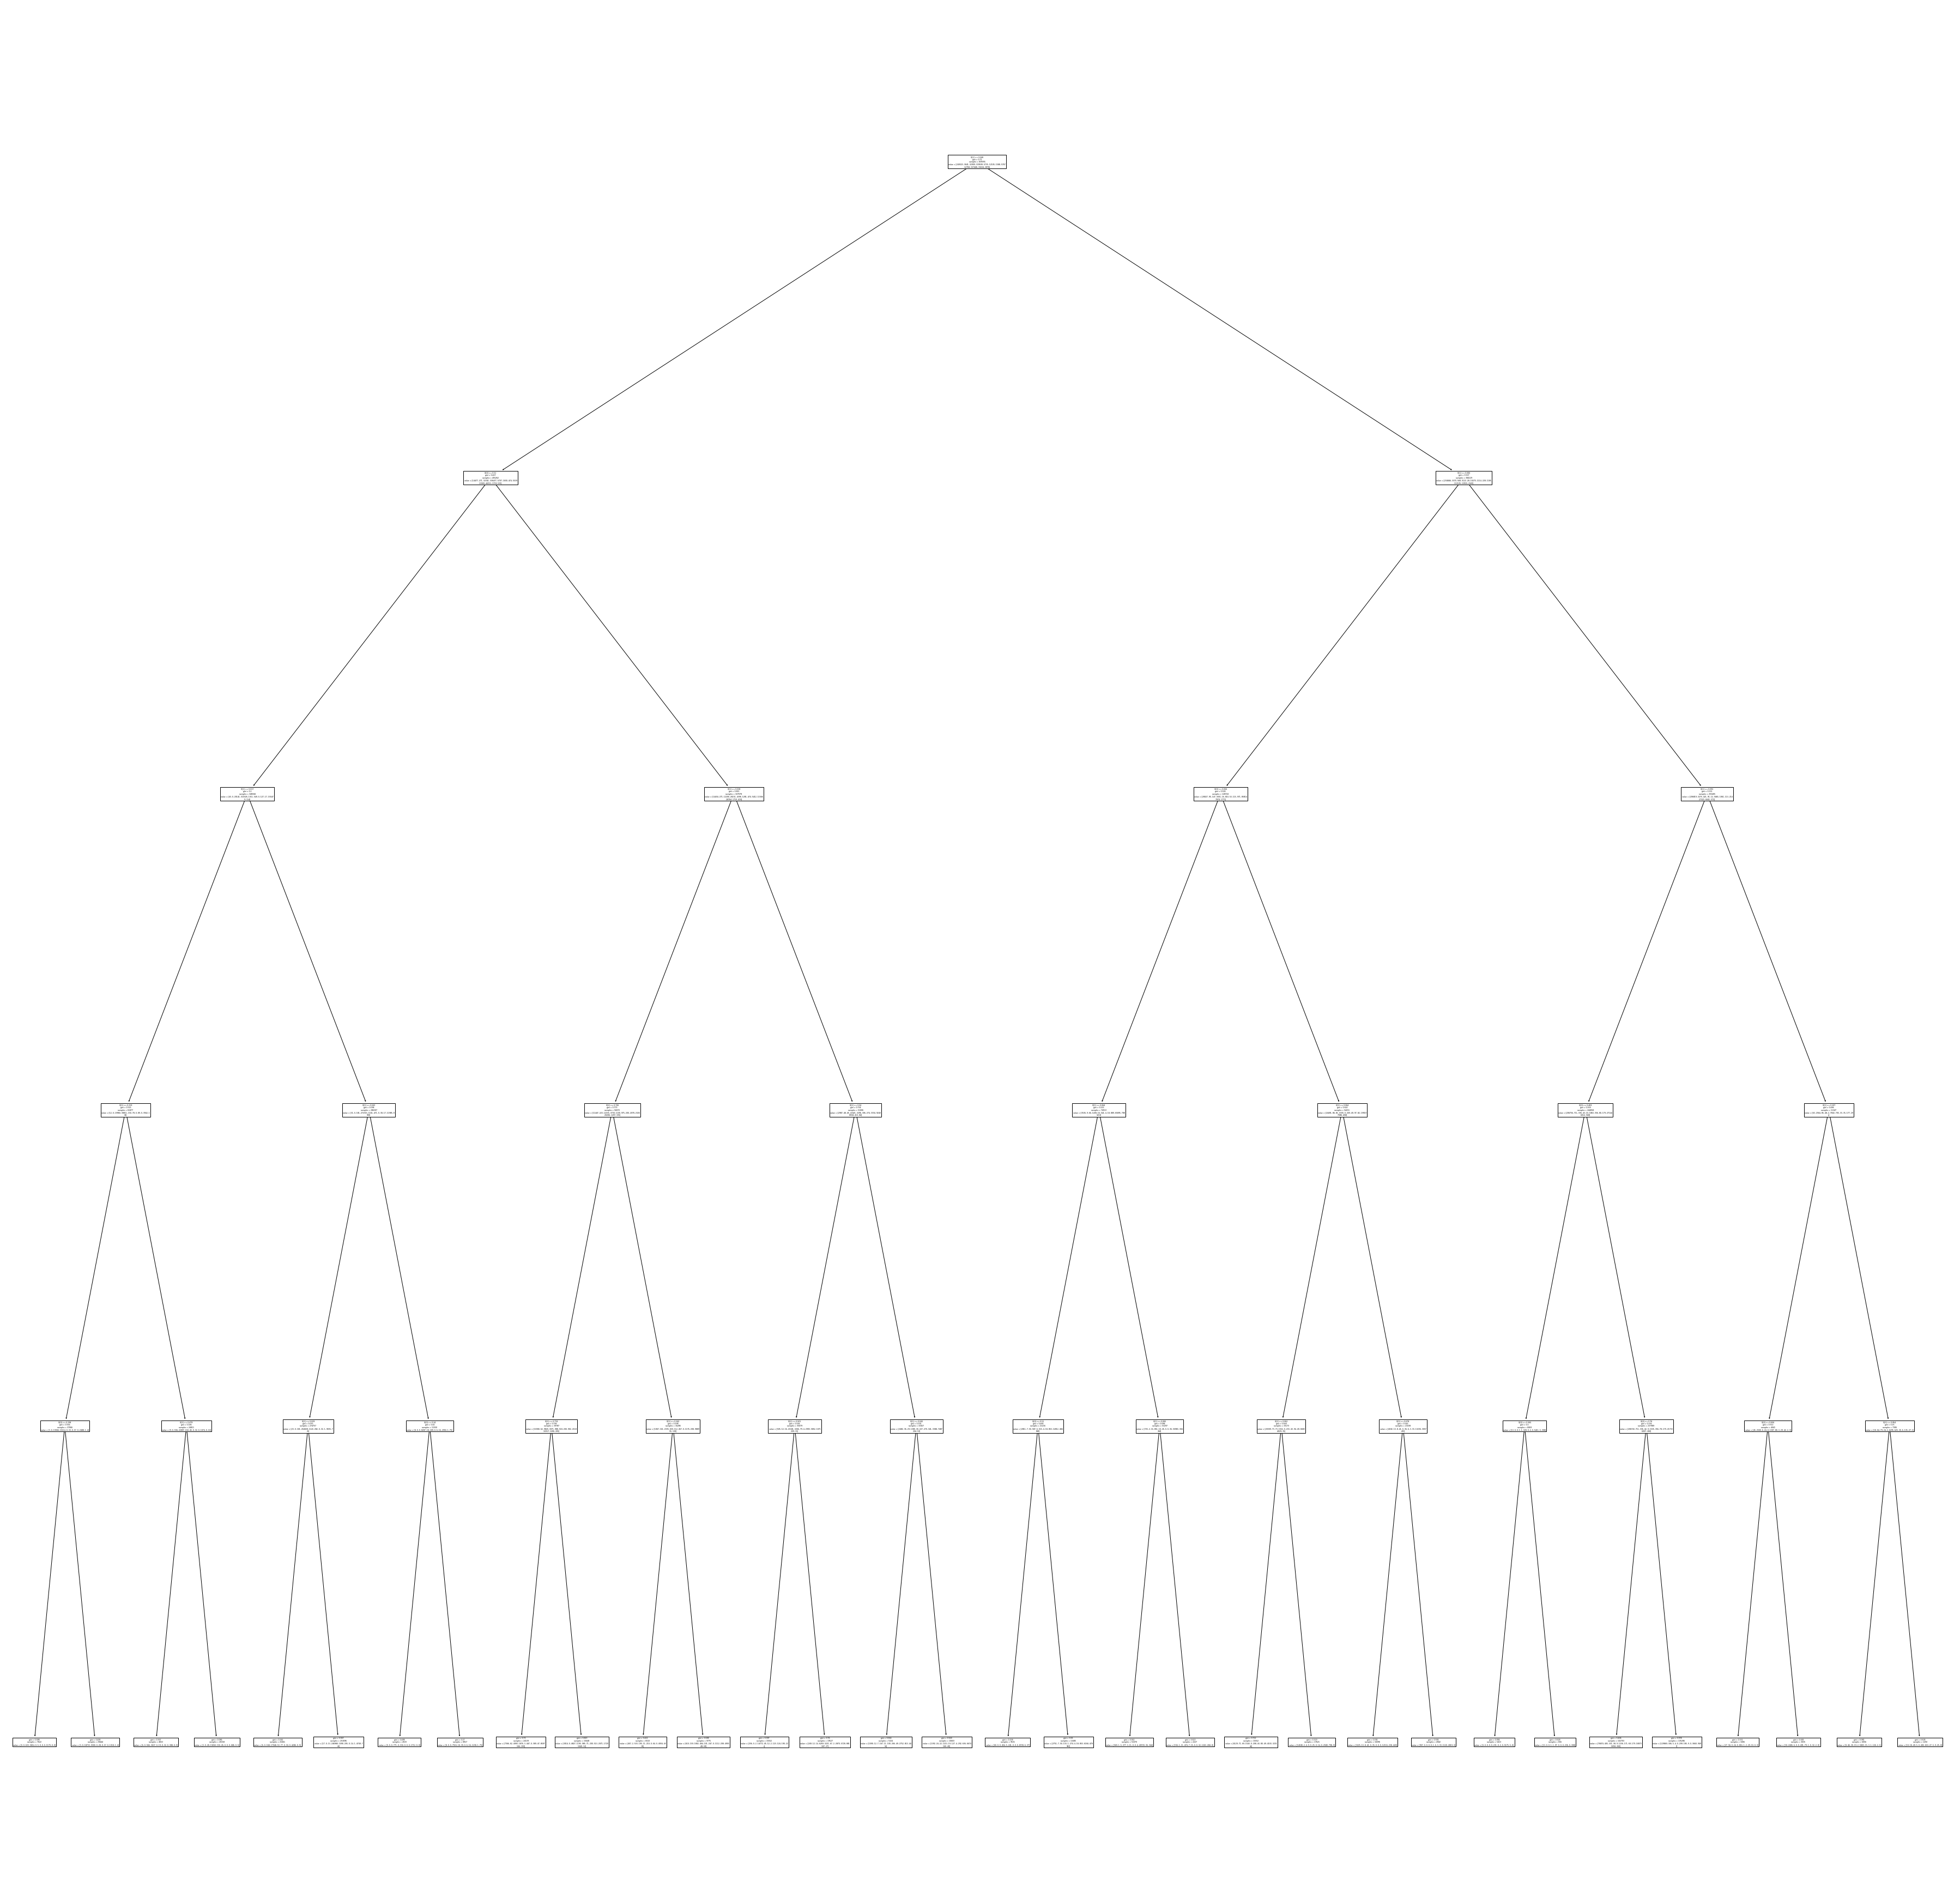

In [20]:
fig1 = matplotlib.pyplot.figure(figsize=(64,64))
_ = sklearn.tree.plot_tree(dt_clf)
matplotlib.pyplot.show()
fig1.savefig('treevis.svg',bbox_inches='tight')

In [21]:
random_forest_hyperparameters = {
    'max_depth' : 5, # reduce chance of overfitting
    'min_samples_leaf' :  2, #ensure that there won't be too small a number of samples in a leaf node
    'min_samples_split' :  5, # ensure more sample at a node when it splits
    'n_estimators' : 20, # restrict number of trees in forest
}

In [22]:
%%time
rf_clf = sklearn.ensemble.RandomForestClassifier(
    **random_forest_hyperparameters
)
rf_clf.fit(X_train, y_train)

CPU times: user 31.2 s, sys: 439 ms, total: 31.6 s
Wall time: 31.6 s


RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=20)

In [23]:
for p1,param_val in rf_clf.get_params().items():
    print(f'param value {p1}={param_val}')

param value bootstrap=True
param value ccp_alpha=0.0
param value class_weight=None
param value criterion=gini
param value max_depth=5
param value max_features=auto
param value max_leaf_nodes=None
param value max_samples=None
param value min_impurity_decrease=0.0
param value min_impurity_split=None
param value min_samples_leaf=2
param value min_samples_split=5
param value min_weight_fraction_leaf=0.0
param value n_estimators=20
param value n_jobs=None
param value oob_score=False
param value random_state=None
param value verbose=0
param value warm_start=False


In [24]:
rf_clf.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=5, random_state=783240642),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=5, random_state=1213600304),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=5, random_state=1700548388),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=5, random_state=1733670995),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=5, random_state=966911648),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_samples_split=5, random_state=1778676609),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=2,
                        min_sa

In [25]:
X_test = numpy.concatenate(
    [scaler1.transform(xbt_test[[feature_name]]) for feature_name, scaler1 in scaler_dict.items()],
    axis=1)
y_test = target_encoder.transform(xbt_test[target_feature])

In [26]:
rf_clf.predict_proba(X_test)

array([[9.08107633e-01, 5.19127017e-03, 3.01362241e-03, ...,
        5.49825209e-02, 1.28831412e-02, 4.49815296e-04],
       [1.77452790e-01, 1.85969929e-03, 1.50889026e-01, ...,
        4.31181365e-01, 1.30676963e-02, 1.16221363e-02],
       [4.19324229e-02, 2.17106862e-04, 2.83852811e-02, ...,
        8.04394338e-02, 2.03561053e-02, 9.87281092e-04],
       ...,
       [9.40253547e-01, 3.53575420e-03, 9.37674586e-04, ...,
        3.59313011e-02, 6.57249282e-03, 3.45282584e-04],
       [2.33983031e-01, 3.87325909e-03, 5.98367872e-02, ...,
        3.14848937e-01, 2.43996142e-02, 3.81598771e-03],
       [8.47162680e-05, 5.34373581e-07, 4.90245515e-03, ...,
        2.96171821e-02, 3.09675965e-05, 1.48707351e-04]])

In [27]:
y_pred_dt = dt_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

<AxesSubplot:title={'center':'frequency of different labels for random forest predictions.'}, ylabel='None'>

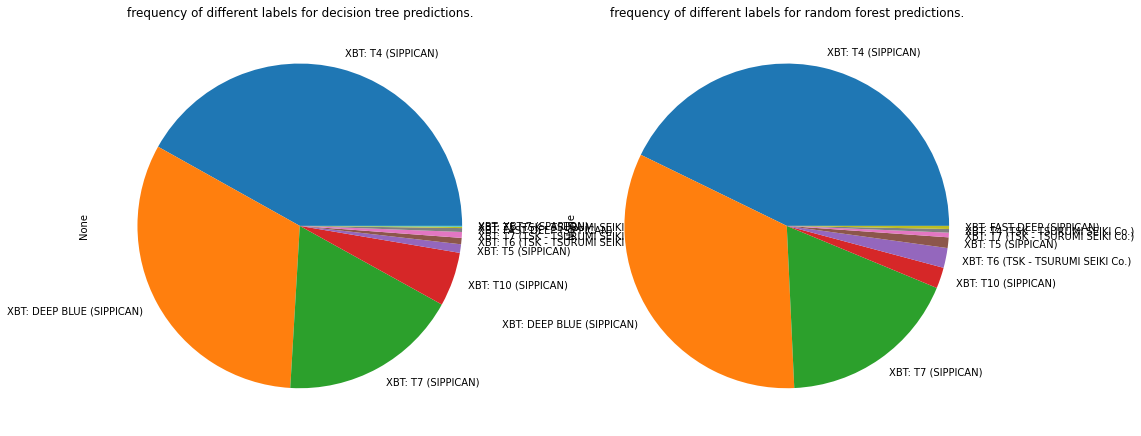

In [28]:
fig1 = matplotlib.pyplot.figure(figsize=(16,8))
ax1 = fig1.add_subplot(1,2,1, title='frequency of different labels for decision tree predictions.')
pandas.Series(target_encoder.inverse_transform(y_pred_dt)).value_counts().plot.pie(ax=ax1)
ax1 = fig1.add_subplot(1,2,2, title='frequency of different labels for random forest predictions.')
pandas.Series(target_encoder.inverse_transform(y_pred_rf)).value_counts().plot.pie(ax=ax1)
                       

In [29]:
len(list(target_encoder.classes_)), len(list(sklearn.metrics.precision_score(y_test, y_pred_dt, average=None)))

/home/h01/shaddad/.conda/envs/ml-weather-tutorial-tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(12, 12)

In [30]:
xbt_train['instrument'].unique().shape

(12,)

In [31]:
prec_dt, recall_dt, f1_dt, support_dt = sklearn.metrics.precision_recall_fscore_support(y_test, y_pred_dt, average=None)
prec_rf, recall_rf, f1_rf, support_rf = sklearn.metrics.precision_recall_fscore_support(y_test, y_pred_rf, average=None)
metrics_xbt = pandas.DataFrame({
    'classes': list(target_encoder.classes_),
    'precision_dt': list(prec_dt),
    'precision_rf': list(prec_rf),
    'recall_dt': list(recall_dt),
    'recall_rf': list(recall_rf),
    'f1_dt': list(f1_dt),
    'f1_rf': list(f1_rf),
    'support_dt': list(support_dt),
    'support_rf': list(support_rf),  
})

/home/h01/shaddad/.conda/envs/ml-weather-tutorial-tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h01/shaddad/.conda/envs/ml-weather-tutorial-tf/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:xlabel='classes'>

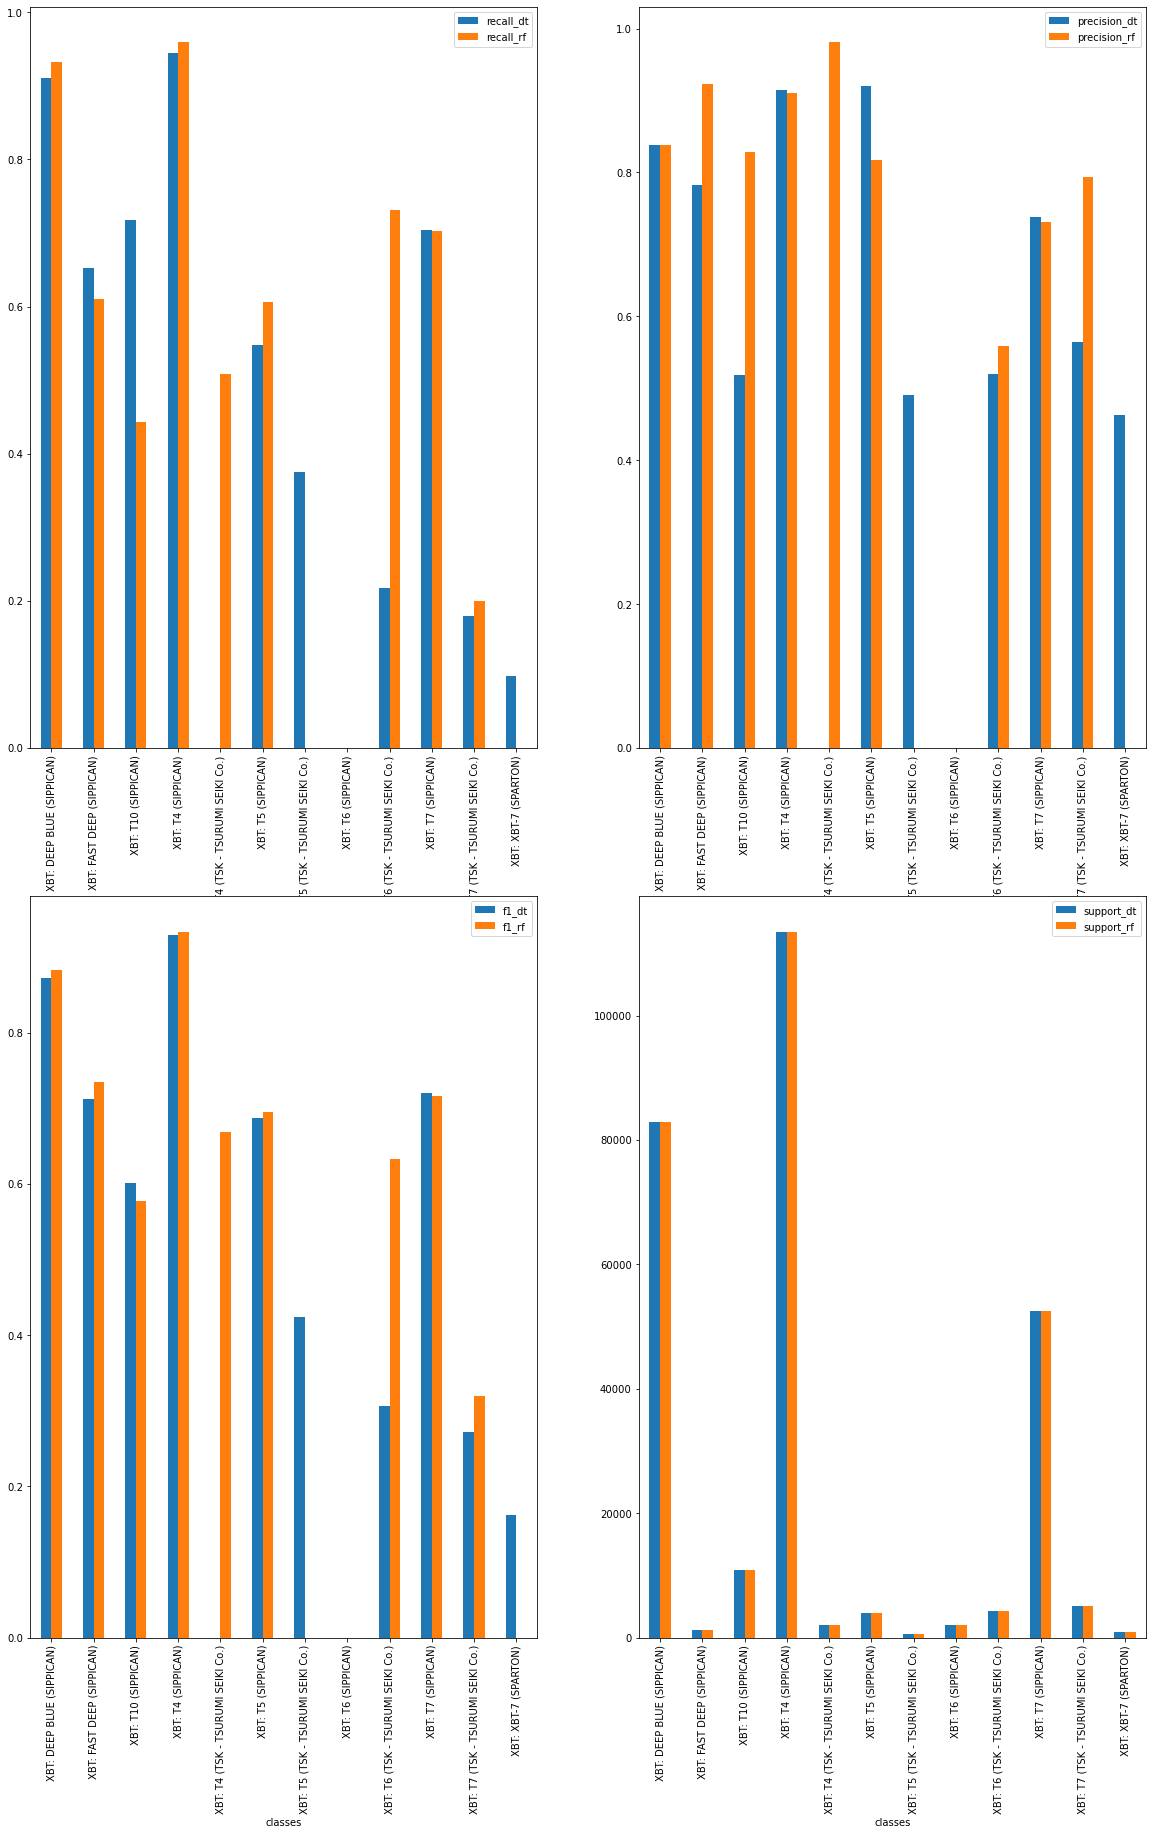

In [32]:
fig1 = matplotlib.pyplot.figure(figsize=(20,30))
ax1 = fig1.add_subplot(2,2,1)
metrics_xbt.plot.bar(x='classes',y=['recall_dt','recall_rf'],ax=ax1)
ax1 = fig1.add_subplot(2,2,2)
metrics_xbt.plot.bar(x='classes',y=['precision_dt','precision_rf'],ax=ax1)
ax1 = fig1.add_subplot(2,2,3)
metrics_xbt.plot.bar(x='classes',y=['f1_dt','f1_rf'],ax=ax1)
ax1 = fig1.add_subplot(2,2,4)
metrics_xbt.plot.bar(x='classes',y=['support_dt','support_rf'],ax=ax1)


## Tutorial - Neural Networks

A lot of the staggering advancement in recent years in applying machine learning to complex real-world situations has come from the use of large neural networks, often referred to as "deep learning" for reasons that will become apparent in this tutorial. To start with lets consider the building block of the neural network: a single "neuron". As the name suggests, this concept in inspired by a biological neuron found in many brains, specifically human brains. I won't elaborate on the similarities and differences here, but will say that artificial neurons do not work like biological neurons, though there continues to interesting cross-pollination of ideas between study of artificial and biological neurons and how networks of them learn.

A single artificial neuron (hereafter just referred to as a neuron), is essentially a linear weighted sum of inputs plus a constant term, to which a threshold operation is applied to the result, so that the output is 1 (activated) or 0 (not activated). The cell is known as a *perceptron*. The perceptron can be trained by iteratively updating the weights so that the error in the output on data, for example training data is reduced and minimised. This is usually done through a process called *gradient descent*. A perceptron can be updated to output a range between 0 and 1, rather than binary 0 or 1 output, using a Sigmoid function rather than a threshold operation. This results in what is known as a *sigmoid neuron*.

Neural networks are a series of these neurons joined together in a network of layers. Initially the computational cost of updating the weights for more than a few neurons was prohibitive. As computers became more powerful, more neurons were used, with more *layers*. A layer is where the input of one set of neurons becomes the input for a subsequent neurons. How neurons are connected together is what determines *network architecture*. Initially There was one layer into which inputs where feed, then the outputs all went to 1 neuron to produce a single output. Subsequently layers were added in between which directly connected to neither input nor output, which are termed hidden layers. A simple feed-forward fully connected network is usually visualised as follows (from wikipedia):
![A feedforward network with 1 hidden layer](images/Colored_neural_network.svg)

The way gradient descent works is to calculate the change in the loss or cost function as you change each weight in turn. As the network grows and the number of weights grows with it, this quickly becomes expensive, and  numerical issues arise with training the weights to produce a good result. Training is now done through a technique called "back-propagation", which efficiently calculates the gradients in the the weights one layer at a time, and uses the the previously calculated gradients for each layer moving backwards to calculate the gradient for the next (hence the name back-propagation where the gradients being calculated propagate backwards like a wave.
Further optimisations have been introduced as networks have grown, such stochastic gradient descent where subsets of training data are used in *batches* to update the weights. The mathematics around this quickly becomes very complex, so consult the references for more on the mathematical details, which are very interesting!

Key terms in a neural network (NN)
* Neuron - a computing unit consisting of a weighted combination of inputs, loosely mimicing a biological neuron found in animal brains. 
* Perceptron - A specific neuron with a linear weighted sum of inputs plus an activation threshold. The term is used somewhat loosely/ambiguously at times in machine learning literature, so be careful to check what exactly the author means if the implementation details are likely to be important for a specific problem.
* Activation - Where the output from a perceptron is zero or non-zero.
* Weights - The co-efficient applied to each input to the neuron.
* Bias - the constant term
* Sigmoid function - A non-linear function applied to the linear weighted sum to ensure the output is in the range 0 to 1.

Key terms in training a NN
* Gradient descent - The process of updating the weights of a neural network, based on the partial derivatives of the cost function with respect to each of the weights in the network, updating the weights "towards" the direction of steepest descent of the cost function.
* back propagation - the process of more efficiently calculating the cost function gradients for a network by calculating one layer at a time, and saving total computation in this way.
* mini batch - In gradient descent, when training using stochastic gradient descent, a mini-batch is the subset of input data for which weight gradient are calculated together.
* epoch - Several batches of processing of updating weights, which cumulatively cover the whole input dataset.
* cost function - the different between the ground truth the network is trying to predict and the actual predictions made by the network.
* local optimum - a place in the cost function where minor changes to parameters will only increase the cost function.
* Learning rate - The scaling factor of the movement "down the slope" during gradient descent. The larger the learning rate the faster the movement of weights towards an optimum, but the greater the change of finding a local optimum.
* vanishing gradients - When using activation functions such as a sigmoid,, which has values between 0 and 1, you can land up with very small gradients being used in back propogation, essentially limiting the ability to update the weights of the network. Various choices in activations and training algorithim (e.g. batch size) can help. Additional one can use *skip conections*, where non adjacent layers are connected, so that larger values are maintained through the network. These are known as *residual networks*.
  * Further reading: [Wikipedia - Vanishing Gradient Problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)
* exploding gradients: Opposite to the vanishing gradient problem, if one chooses activation functions where the function or its derivatives can take on larger values than in the 0 to 1 range, gradients can multiply and explode, especially in very deep recurrent networks. 
  * Further reading: [A Gentle Introduction to Exploding Gradients](https://machinelearningmastery.com/exploding-gradients-in-neural-networks/)


Hyperparameters
* learning rate (see above)
* batch size - the input of input points used for calculate a batch of gradients in stochastic gradient descent.
* solver - The variant of gradient descent with back propagation used for training
* maximum iterations - The total number of training loops (usually epochs) before terminating (if another stopping condition is not reached).
 
Types of NN
* feed forward - where predictions move forward through the network from input to output
* Convolutional Neural Network - Where some weights are shared, in the form of convolutional kernels (like image processing). The network learns these kernels along with other weights.
* Recurrent Neural Network - A network where some outputs feedback as input to previous layers. With careful arrangement, this allows the network to have a "memory" of previous input. This is used to learn data in a series or sequence, e.g. a time series variable or the words in a sentence.
* Graphical Neural Network - A neural network structured around a graph representation of data.
 

## Example - SOCRATES Radiation Model Emulation

In our first example, we will be trying to emulate the SOCRATES radiation scheme in the Unified Model. This is a supervised regression problem, trying to emulate the very complex function represented by the radiation scheme,

In [33]:
import tensorflow 
import keras
import tensorflow.keras
import tensorflow.keras.layers 
import tensorflow.keras.models 
import code

## Define inputs
Specify the hyperparameters for the pipeline and the location of the input data

In [34]:
data_dir   = pathlib.Path('/project/informatics_lab/data_science_cop/socrates_emulation/')
output_dir = pathlib.Path(os.environ['SCRATCH']) / 'ml_weather_tutorial'

if not output_dir.is_dir():
    output_dir.mkdir()
    print(f'creating directory {output_dir}')

Set up the hyperparameters for training the neural network.

In [35]:
wl='sw'
target='nflx' # net flux, or net divergence (ndiv), which interacts with model and is used to calculate heating rate increments.
nsamps = '50.0K'  # randomly sampled from train / test sets.
# try 100K and 200K
scale_data = True
if wl=='sw':
  model = 'sw_260'
  model_ref = 'sw_ga7'
elif wl=='lw':
  model = 'lw_300'
  model_ref = 'lw_ga7'


Construct the paths to file names that contain the data

In [36]:
fnext='train'
fn_meta = model+'_meta_'+nsamps+'_'+fnext+'.npz'
fn_dat_levs = model+'_dat_levs_'+nsamps+'_'+fnext+'.npz'
fn_dat_lays = model+'_dat_lays_'+nsamps+'_'+fnext+'.npz'
fn_dat_surf = model+'_dat_surf_'+nsamps+'_'+fnext+'.npz'
if target=='nflx':
  fn_trg = model+'_trg_levs_'+nsamps+'_'+fnext+'.npz'
if target=='ndiv':
  fn_trg = model+'_trg_lays_'+nsamps+'_'+fnext+'.npz'
 
fnext='test'
fn_meta_test = model+'_meta_'+nsamps+'_'+fnext+'.npz'
fn_dat_levs_test = model+'_dat_levs_'+nsamps+'_'+fnext+'.npz'
fn_dat_lays_test = model+'_dat_lays_'+nsamps+'_'+fnext+'.npz'
fn_dat_surf_test = model+'_dat_surf_'+nsamps+'_'+fnext+'.npz'
if target=='nflx':
  fn_trg_test = model+'_trg_levs_'+nsamps+'_'+fnext+'.npz'
  fn_trg_ref = model_ref+'_trg_levs_'+nsamps+'_'+fnext+'.npz'
if target=='ndiv':
  fn_trg_test = model+'_trg_lays_'+nsamps+'_'+fnext+'.npz'
  fn_trg_ref = model_ref+'_trg_lays_'+nsamps+'_'+fnext+'.npz'

print('root dir:',data_dir)

root dir: /project/informatics_lab/data_science_cop/socrates_emulation


### Loading and preparing the training data

In [37]:
print('loading',fn_dat_lays)
with numpy.load(data_dir / fn_dat_lays) as npzfile:
    dat_lays = npzfile['dat_lays']
    
print('loading',fn_dat_surf)
with numpy.load(data_dir / fn_dat_surf) as npzfile:
    dat_surf = npzfile['dat_surf']
    
print('loading',fn_trg)
with numpy.load(data_dir / fn_trg) as npzfile:
    if target=='nflx':
         trg = npzfile['trg_levs']
    elif target=='ndiv':
         trg = npzfile['trg_lays']

loading sw_260_dat_lays_50.0K_train.npz
loading sw_260_dat_surf_50.0K_train.npz
loading sw_260_trg_levs_50.0K_train.npz


In [38]:
nsamps = trg.shape[0]
nlays = dat_lays.shape[1]
nlay_feats = dat_lays.shape[2]
nsurf_feats = dat_surf.shape[1]

### Single level features 

Some of the feature are single level features, so there is one scalar value per column. These features include:
* `stoa - top most atmospheric radiation
* ``surfsw` / `surflw` - surface albedo for long-wave (lw) or short-wave (sw) radiation
* `szen` - solar zenith
* `tstar` -temperature scaling factor

In [39]:
dat_surf.shape

(50000, 4)

### Features on layers
These input features have a value for each layer (a layer is a slice of the atmosphere between different model levels). 
These include various atmospheric measurements: cloud quantities, aerosols, temp, humidity and pressure,
data taken from GA7 case study suite

Layer inputs
* accum 
* agocff
* agsoot
* aitken
* biogenic
* bioms1
* bioms2
* clfr
* dustdiv1
* dustdiv2
* dustdiv3
* dustdiv4
* dustdiv5
* dustdiv6
* frocff
* frsoot
* iclfr
* ire
* iwm
* lwm
* naclflm
* nacljet
* o3
* p
* q
* re
* sulph
* t
* wclfr



In [40]:
dat_lays.shape

(50000, 70, 35)

In [41]:
# net flux at each level, for 50k randfomly selected points
trg.shape

(50000, 71)

In [42]:
if scale_data: # normalize by range
  scaler_lays = []
  use_lays = []
  for ic in range(nlay_feats):
    min0 = numpy.min(dat_lays[:,:,ic])
    range0 = numpy.max(dat_lays[:,:,ic]) - min0
    if range0 > 0.:
      dat_lays[:,:,ic] = (dat_lays[:,:,ic] - min0)/range0
      scaler_lays.append([min0, range0])
      use_lays.append(ic)
  if len(use_lays)<nlay_feats:
    print('removing constant layer features:', nlay_feats-len(use_lays))
    dat_lays = dat_lays[:,:,use_lays]
    nlay_feats = len(use_lays)
      

  scaler_surf = []
  use_surf = []
  for ic in range(nsurf_feats):
    min0 = numpy.min(dat_surf[:,ic])
    range0 = numpy.max(dat_surf[:,ic]) - min0
    if range0 > 0.:
      dat_surf[:,ic] = (dat_surf[:,ic] - min0)/range0
      scaler_surf.append([min0, range0])
      use_surf.append(ic)
  if len(use_surf)<nsurf_feats:
    print('removing constant surf features:', nsurf_feats-len(use_surf))
    dat_surf = dat_surf[:,:,use_surf]
    nsurf_feats = len(use_surf)

removing constant layer features: 6


In [43]:
ntrg_samps = trg.shape[0]

if target=='nflx' or target=='ndiv':
  nouts=1
  ntrg_levs = trg.shape[1]


Here we define the model architecture for the two neural network models that we are building. The first is a standard *feed-forward* network. We have 7 layers in our network (5 hidden layers). The network takes a combination of height level inputs and surface inputs. The output includes a value for each of the height levels in the original atmosphere simulation.

In [44]:
def build_model_mlp(nlays, nlay_feats):
    profile_input = tensorflow.keras.layers.Input(shape=(nlays, nlay_feats), name='profile_input')
    surf_input = tensorflow.keras.layers.Input(shape=(nsurf_feats,), name='surf_input')
    flat_profs = tensorflow.keras.layers.Flatten()(profile_input)
    raw_in = tensorflow.keras.layers.concatenate([flat_profs, surf_input])
    raw_size = (nlays*nlay_feats)+nsurf_feats
    prof_size = nlays*nlay_feats

    x = tensorflow.keras.layers.Dense(512, use_bias=False, activation='relu')(raw_in)
    x = tensorflow.keras.layers.Dense(512, use_bias=False, activation='relu')(x)
    x = tensorflow.keras.layers.Dense(256, use_bias=False, activation='relu')(x)
    x = tensorflow.keras.layers.Dense(256, use_bias=False, activation='relu')(x)
    x = tensorflow.keras.layers.Dense(128, use_bias=False, activation='relu')(x)
    x = tensorflow.keras.layers.Dense(128, use_bias=False, activation='relu')(x)

    main_output = tensorflow.keras.layers.Dense(ntrg_levs, use_bias=True, activation='linear', name='main_output')(x)
    model = tensorflow.keras.models.Model(inputs=[profile_input, surf_input], outputs=[main_output])
    return model

Next we define a 1D convolutional neural. We have three convolutional layers, followed by 4 dense layers to produce the same size output as in our dense feed-forward network. The keyadvnatage in a convolutional NN is that it understands the relationships between adjacent values, whereas as a dense network consider all values to be equally close/similar. A CNN can also use fewer parameters compared to a dense network.


In [45]:
def build_model_cnn(nlays, nlay_feats):
    profile_input = tensorflow.keras.layers.Input(shape=(nlays, nlay_feats), name='profile_input')
    surf_input = tensorflow.keras.layers.Input(shape=(nsurf_feats,), name='surf_input')
    flat_profs = tensorflow.keras.layers.Flatten()(profile_input)
    raw_in = tensorflow.keras.layers.concatenate([flat_profs, surf_input])
    raw_size = (nlays*nlay_feats)+nsurf_feats
    prof_size = nlays*nlay_feats

    out = tensorflow.keras.layers.ZeroPadding1D(padding=1)(profile_input)
    out = tensorflow.keras.layers.Conv1D(32, 3, strides=1, activation='relu', use_bias=False, kernel_initializer='glorot_uniform', bias_initializer='zeros')(out)
    ident = out
    out = tensorflow.keras.layers.ZeroPadding1D(padding=1)(out)
    out = tensorflow.keras.layers.Conv1D(32, 3, strides=1, activation='relu', use_bias=False, kernel_initializer='glorot_uniform', bias_initializer='zeros')(out)
    out = tensorflow.keras.layers.ZeroPadding1D(padding=1)(out)
    out = tensorflow.keras.layers.Conv1D(32, 3, strides=1, activation='relu', use_bias=False, kernel_initializer='glorot_uniform', bias_initializer='zeros')(out)
    x = tensorflow.keras.layers.add([out, ident])
    out = tensorflow.keras.layers.Flatten()(x)
    out = tensorflow.keras.layers.Dense(prof_size, use_bias=False, activation='relu')(out)

    out = tensorflow.keras.layers.concatenate([out, surf_input])
    x = tensorflow.keras.layers.add([out, raw_in])
    x = tensorflow.keras.layers.Dense(1024, use_bias=False, activation='relu')(x)
    x = tensorflow.keras.layers.Dense(1024, use_bias=False, activation='relu')(x)

    main_output = tensorflow.keras.layers.Dense(ntrg_levs, use_bias=True, activation='linear', name='main_output')(x)
    model = tensorflow.keras.models.Model(inputs=[profile_input, surf_input], outputs=[main_output])
    return model

In [46]:
model_dict = {'mlp': {'build_func': build_model_mlp,},
              'cnn_1d': {'build_func': build_model_cnn,},
             }

In [47]:
%%time
for model_name in model_dict.keys():
    print(f'building and training model {model_name}')
    model_dict[model_name]['model_object'] = model_dict[model_name]['build_func'](nlays=nlays, nlay_feats=nlay_feats)
    model_dict[model_name]['model_object'].compile(loss='mean_absolute_error',
                                                   optimizer='adam')
    model_dict[model_name]['model_object'].fit([dat_lays, dat_surf], trg, epochs=1, batch_size=32, verbose=0)

building and training model mlp


2022-11-17 15:15:25.105730: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


building and training model cnn_1d
CPU times: user 3min 57s, sys: 23.5 s, total: 4min 20s
Wall time: 1min 19s


In [48]:
print('loading',fn_dat_lays_test)
with numpy.load(data_dir / fn_dat_lays_test) as npzfile:
    dat_lays_test = npzfile['dat_lays']

print('loading',fn_dat_surf_test)
with numpy.load(data_dir / fn_dat_surf_test) as npzfile:
    dat_surf_test = npzfile['dat_surf']

print('loading',fn_trg_test)
with numpy.load(data_dir / fn_trg_test)as npzfile:
    if target=='nflx':
        trg_test = npzfile['trg_levs']
    elif target=='ndiv':
         trg_test = npzfile['trg_lays']

print('loading',fn_trg_ref)
with numpy.load(data_dir / fn_trg_ref) as npzfile:
    if target=='nflx':
         trg_ref = npzfile['trg_levs_ref'] # GA& operational output
    elif target=='ndiv':
         trg_ref = npzfile['trg_lays_ref']

loading sw_260_dat_lays_50.0K_test.npz
loading sw_260_dat_surf_50.0K_test.npz
loading sw_260_trg_levs_50.0K_test.npz
loading sw_ga7_trg_levs_50.0K_test.npz


In [49]:
# scale test data
if scale_data: # normalize by range
  dat_lays_test = dat_lays_test[:,:,use_lays]
  for ic in range(nlay_feats):
    dat_lays_test[:,:,ic] = (dat_lays_test[:,:,ic] - scaler_lays[ic][0])/scaler_lays[ic][1]

  dat_surf_test = dat_surf_test[:,use_surf]
  for ic in range(nsurf_feats):
    dat_surf_test[:,ic] = (dat_surf_test[:,ic] - scaler_surf[ic][0])/scaler_surf[ic][1]



### Do inference on test data

Next we load in the test data and do inference to check the result

In [50]:
predictions = {}

In [51]:
for model_name, selected_model in model_dict.items():
  predictions[model_name] = selected_model['model_object'].predict([dat_lays_test, dat_surf_test])

In [52]:
%%time
metrics_dict = {}
for model_name in model_dict.keys():
    metrics_dict[model_name] = {}
    metrics_dict[model_name]['me_p'] = numpy.zeros(ntrg_levs)
    metrics_dict[model_name]['me_ctl'] = numpy.zeros(ntrg_levs)
    metrics_dict[model_name]['mae_p'] = numpy.zeros(ntrg_levs)
    metrics_dict[model_name]['mae_ctl'] = numpy.zeros(ntrg_levs)
    for ilev in range(ntrg_levs):
      metrics_dict[model_name]['me_p'][ilev] = numpy.mean(predictions[model_name][:,ilev] - trg_test[:,ilev])
      metrics_dict[model_name]['me_ctl'][ilev] = numpy.mean(trg_ref[:,ilev] - trg_test[:,ilev])
      metrics_dict[model_name]['mae_p'][ilev] = numpy.mean(numpy.abs(predictions[model_name][:,ilev] - trg_test[:,ilev]))
      metrics_dict[model_name]['mae_ctl'][ilev] = numpy.mean(numpy.abs(trg_ref[:,ilev] - trg_test[:,ilev]))    

CPU times: user 286 ms, sys: 3.82 ms, total: 290 ms
Wall time: 288 ms


### Visualise metrics

Display the performance metrics for our trained algorithms.

In [53]:
model_dict.keys()

dict_keys(['mlp', 'cnn_1d'])

In [54]:
yax = numpy.arange(1,len(metrics_dict['mlp']['me_p'][1:])+1)[::-1]


In [55]:
model_dict.keys()

dict_keys(['mlp', 'cnn_1d'])

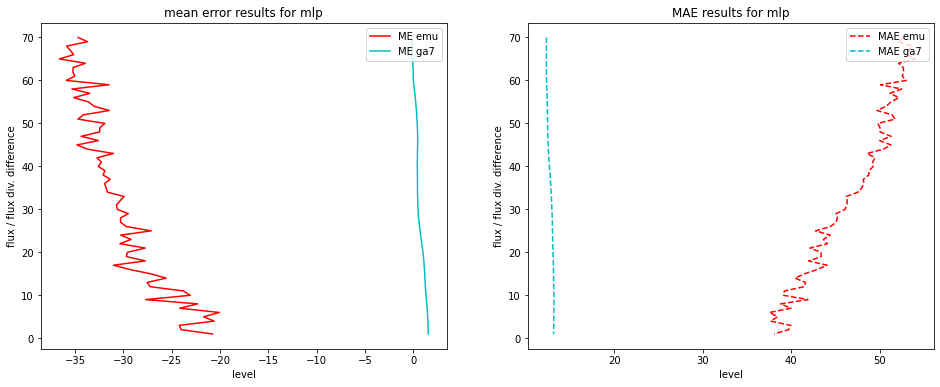

In [56]:
model_name = 'mlp'
fig1 = matplotlib.pyplot.figure('compare_NN_results', figsize=(16,6))
ax1 = fig1.add_subplot(1,2, 1 ,title=f'mean error results for {model_name}')
ax1.plot(metrics_dict[model_name]['me_p'][1:],yax, '-r', label='ME emu')
ax1.set_xlabel('level')
ax1.set_ylabel('flux / flux div. difference')
ax1.legend(loc='upper right')

ax1.plot(metrics_dict[model_name]['me_ctl'][1:],yax, '-c', label='ME ga7')
ax1.set_xlabel('level')
ax1.set_ylabel('flux / flux div. difference')
ax1.legend(loc='upper right')

ax1 = fig1.add_subplot(1,2, 2, title=f'MAE results for {model_name}')
ax1.plot(metrics_dict[model_name]['mae_p'][1:],yax, '--r', label='MAE emu')
ax1.set_xlabel('level')
ax1.set_ylabel('flux / flux div. difference')
ax1.legend(loc='upper right')

ax1.plot(metrics_dict[model_name]['mae_ctl'][1:],yax, '--c', label='MAE ga7')
ax1.set_xlabel('level')
ax1.set_ylabel('flux / flux div. difference')
ax1.legend(loc='upper right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


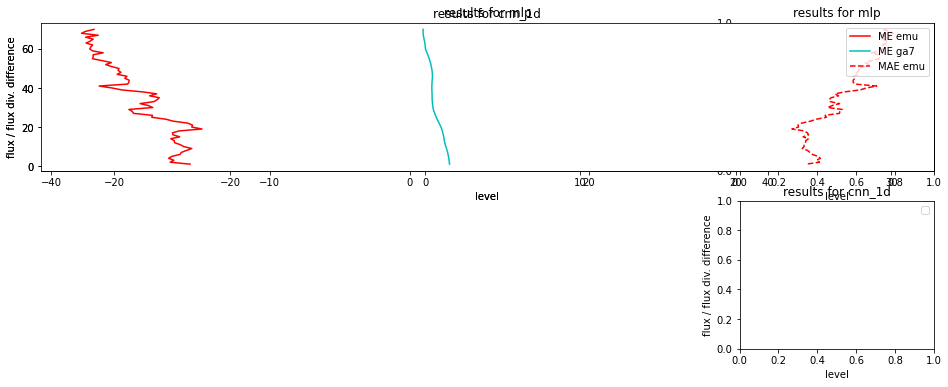

In [57]:
fig1 = matplotlib.pyplot.figure('compare_NN_results', figsize=(16,6))
for ix1,model_name in enumerate(model_dict.keys()):
    ax1 = fig1.add_subplot(2,1, 1 ,title=f'results for {model_name}')
    ax1.plot(metrics_dict[model_name]['me_p'][1:],yax, '-r', label='ME emu')
    ax1.set_xlabel('level')
    ax1.set_ylabel('flux / flux div. difference')
    ax1.legend(loc='upper right')
  
    
    # ax1 = fig1.add_subplot(2,4, (4*ix1) + 3, title=f'results for {model_name}')
    ax1.plot(metrics_dict[model_name]['me_ctl'][1:],yax, '-c', label='ME ga7')
    ax1.set_xlabel('level')
    ax1.set_ylabel('flux / flux div. difference')
    ax1.legend(loc='upper right')
    
    # ax1 = fig1.add_subplot(2,4,(4*ix1) + 2, title=f'results for {model_name}')
    ax1.plot(metrics_dict[model_name]['mae_p'][1:],yax, '--r', label='MAE emu')
    ax1.set_xlabel('level')
    ax1.set_ylabel('flux / flux div. difference')
    ax1.legend(loc='upper right')
    
    ax1 = fig1.add_subplot(2,4, (4*ix1) + 4, title=f'results for {model_name}')
    # ax1.plot(metrics_dict[model_name]['mae_ctl'][1:],yax, '--c', label='MAE ga7')
    ax1.set_xlabel('level')
    ax1.set_ylabel('flux / flux div. difference')
    ax1.legend(loc='upper right')

### Example - Recurrent Neural Network

** This example is under construction, do not use!**

In [58]:
try:
    falklands_data_dir = os.environ['OPMET_ROTORS_DATA_ROOT']
except KeyError:
    falklands_data_dir = '/project/informatics_lab/data_science_cop/ML_challenges/2021_opmet_challenge'
falklands_data_dir = pathlib.Path(falklands_data_dir) /  'Rotors'

In [59]:
falklands_data_fname = 'new_training.csv'
falklands_data_path = falklands_data_dir / falklands_data_fname
falklands_df = pandas.read_csv(falklands_data_path)

In [60]:
temp_feature_names = [f'air_temp_{i1}' for i1 in range(1,23)]
humidity_feature_names = [f'sh_{i1}' for i1 in range(1,23)]
wind_direction_feature_names = [f'winddir_{i1}' for i1 in range(1,23)]
wind_speed_feature_names = [f'windspd_{i1}' for i1 in range(1,23)]
target_feature_name = 'rotors_present'


In [61]:
falklands_df = falklands_df.rename({'Rotors 1 is true': target_feature_name},axis=1)
falklands_df.loc[falklands_df[falklands_df[target_feature_name].isna()].index, target_feature_name] = 0
falklands_df['DTG'] = pandas.to_datetime(falklands_df['DTG'])
falklands_df = falklands_df.drop_duplicates(subset=['DTG'])
falklands_df = falklands_df[~falklands_df['DTG'].isnull()]
falklands_df = falklands_df[(falklands_df['wind_speed_obs'] >= 0.0) &
                            (falklands_df['air_temp_obs'] >= 0.0) &
                            (falklands_df['wind_direction_obs'] >= 0.0) &
                            (falklands_df['dewpoint_obs'] >= 0.0) 
                           ]
falklands_df = falklands_df.drop_duplicates(subset='DTG')
falklands_df[target_feature_name]  = falklands_df[target_feature_name] .astype(bool)
falklands_df['time'] = pandas.to_datetime(falklands_df['DTG'])

In [62]:
def get_v_wind(wind_dir_name, wind_speed_name, row1):
    return math.cos(math.radians(row1[wind_dir_name])) * row1[wind_speed_name]

def get_u_wind(wind_dir_name, wind_speed_name, row1):
    return math.sin(math.radians(row1[wind_dir_name])) * row1[wind_speed_name]

In [63]:
%%time
u_feature_template = 'u_wind_{level_ix}'
v_feature_template = 'v_wind_{level_ix}'
u_wind_feature_names = []
v_wind_features_names = []
for wsn1, wdn1 in zip(wind_speed_feature_names, wind_direction_feature_names):
    level_ix = int( wsn1.split('_')[1])
    u_feature = u_feature_template.format(level_ix=level_ix)
    u_wind_feature_names += [u_feature]
    falklands_df[u_feature] = falklands_df.apply(functools.partial(get_u_wind, wdn1, wsn1), axis='columns')
    v_feature = v_feature_template.format(level_ix=level_ix)
    v_wind_features_names += [v_feature]
    falklands_df[v_feature] = falklands_df.apply(functools.partial(get_v_wind, wdn1, wsn1), axis='columns')

CPU times: user 17.6 s, sys: 1.73 s, total: 19.3 s
Wall time: 19.3 s


In [64]:
rotors_train_df = falklands_df[falklands_df['time'] < datetime.datetime(2020,1,1,0,0)]
rotors_test_df = falklands_df[falklands_df['time'] > datetime.datetime(2020,1,1,0,0)]

In [65]:
def preproc_input(data_subset, pp_dict):
    return numpy.concatenate([scaler1.transform(data_subset[[if1]]) for if1,scaler1 in pp_dict.items()],axis=1)

def preproc_target(data_subset, enc1):
     return enc1.transform(data_subset[[target_feature_name]])


In [66]:
input_feature_names = temp_feature_names + humidity_feature_names + u_wind_feature_names + v_wind_features_names
preproc_dict = {}
for if1 in input_feature_names:
    scaler1 = sklearn.preprocessing.StandardScaler()
    scaler1.fit(rotors_train_df[[if1]])
    preproc_dict[if1] = scaler1
    
target_encoder = sklearn.preprocessing.LabelEncoder()
target_encoder.fit(rotors_train_df[[target_feature_name]])

/home/h01/shaddad/.conda/envs/ml-weather-tutorial-tf/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LabelEncoder()

In [77]:
preproc_dict

{'air_temp_1': StandardScaler(),
 'air_temp_2': StandardScaler(),
 'air_temp_3': StandardScaler(),
 'air_temp_4': StandardScaler(),
 'air_temp_5': StandardScaler(),
 'air_temp_6': StandardScaler(),
 'air_temp_7': StandardScaler(),
 'air_temp_8': StandardScaler(),
 'air_temp_9': StandardScaler(),
 'air_temp_10': StandardScaler(),
 'air_temp_11': StandardScaler(),
 'air_temp_12': StandardScaler(),
 'air_temp_13': StandardScaler(),
 'air_temp_14': StandardScaler(),
 'air_temp_15': StandardScaler(),
 'air_temp_16': StandardScaler(),
 'air_temp_17': StandardScaler(),
 'air_temp_18': StandardScaler(),
 'air_temp_19': StandardScaler(),
 'air_temp_20': StandardScaler(),
 'air_temp_21': StandardScaler(),
 'air_temp_22': StandardScaler(),
 'sh_1': StandardScaler(),
 'sh_2': StandardScaler(),
 'sh_3': StandardScaler(),
 'sh_4': StandardScaler(),
 'sh_5': StandardScaler(),
 'sh_6': StandardScaler(),
 'sh_7': StandardScaler(),
 'sh_8': StandardScaler(),
 'sh_9': StandardScaler(),
 'sh_10': Standard

In [78]:
X_train_rotors = preproc_input(rotors_train_df, preproc_dict)
y_train_rotors = preproc_target(rotors_train_df, target_encoder)

/home/h01/shaddad/.conda/envs/ml-weather-tutorial-tf/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [68]:
X_test_rotors = preproc_input(rotors_test_df, preproc_dict)
y_test_rotors = preproc_target(rotors_test_df, target_encoder)

/home/h01/shaddad/.conda/envs/ml-weather-tutorial-tf/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [69]:
initial_learning_rate=2e-5
drop_out_rate=0.2
n_epochs=50
batch_size=100

In [70]:
n_nodes = 300
n_layers = 4
inputs_shape=X_train_rotors.shape[1]

In [71]:
def build_ff_nn(n_layers, input_shape):
    model = tensorflow.keras.models.Sequential()
    model.add(tensorflow.keras.layers.Dropout(drop_out_rate, input_shape=(input_shape,)))
    for i in numpy.arange(0,n_layers):
        model.add(tensorflow.keras.layers.Dense(n_nodes, activation='relu', kernel_constraint=tensorflow.keras.constraints.max_norm(3)))
        model.add(tensorflow.keras.layers.Dropout(drop_out_rate))
    model.add(tensorflow.keras.layers.Dense(2, activation='softmax'))             # This is the output layer 
    return model

In [72]:
%%time
rotors_ff_model = build_ff_nn(n_layers=n_layers, input_shape=inputs_shape)
opt = tensorflow.optimizers.Adam(learning_rate=initial_learning_rate)  
rotors_ff_model.compile(optimizer=opt, loss='mse', metrics=[tensorflow.keras.metrics.RootMeanSquaredError()])
rotors_history=rotors_ff_model.fit(X_train_rotors, 
                                   y_train_rotors, 
                                   validation_data=(X_test_rotors, 
                                                    y_test_rotors), 
                                   epochs=n_epochs, 
                                   batch_size=batch_size, 
                                   shuffle=True,
                                   verbose=False,
                                  )


CPU times: user 1min 40s, sys: 5.53 s, total: 1min 46s
Wall time: 42 s


In [118]:
seq_len = 3
num_seq_samples_train = len(X_train_rotors)-seq_len
num_seq_samples_test = len(X_test_rotors)-seq_len
num_features_rotors = len(preproc_dict.keys())

In [119]:
X_train_seq = numpy.zeros((num_seq_samples_train, seq_len, len(preproc_dict.keys())))
for ix1 in range(len(X_train_rotors)-seq_len):
    X_train_seq[ix1,:,:] = X_train_rotors[ix1:(ix1+seq_len),:] 

In [123]:
X_test_seq = numpy.zeros((num_seq_samples_test, seq_len, len(preproc_dict.keys())))
for ix1 in range(len(X_test_rotors)-seq_len):
    X_test_seq[ix1,:,:] = X_test_rotors[ix1:(ix1+seq_len),:] 

In [151]:
y_train_seq = numpy.zeros((num_seq_samples_train, seq_len, 2))
for ix1 in range(seq_len):
    y_train_seq[:,ix1,0] = y_train_rotors[ix1:(num_seq_samples_train+ix1)]
    y_train_seq[:,ix1,1] = 1.0 - y_train_rotors[ix1:(num_seq_samples_train+ix1)]
    

In [152]:
y_test_seq = numpy.zeros((num_seq_samples_test, seq_len, 2))
for ix1 in range(seq_len):
    y_test_seq[:,ix1,0] = y_test_rotors[ix1:(num_seq_samples_test+ix1)]
    y_test_seq[:,ix1,1] = 1.0 - y_test_rotors[ix1:(num_seq_samples_test+ix1)]
    

In [161]:
def build_LSTM_model(input_shape):
    model = tensorflow.keras.Sequential()

    # model.add(tensorflow.keras.layers.Input(shape=(1,input_shape,)))
    # Add a LSTM layer with 128 internal units.
    for ix1 in range(n_layers-1):
        model.add(tensorflow.keras.layers.LSTM(n_nodes, 
                                               return_sequences=True))

    model.add(tensorflow.keras.layers.LSTM(2, 
                                           return_sequences=True,
                                           activation='softmax'
                                          ))
    
    # model.add(tensorflow.keras.layers.Activation('sigmoid'))

    return model


In [162]:
%%time 
rotors_rnn_model = build_LSTM_model(input_shape=inputs_shape)

CPU times: user 22.8 ms, sys: 2.05 ms, total: 24.8 ms
Wall time: 23.2 ms


In [163]:
opt = tensorflow.optimizers.Adam(learning_rate=initial_learning_rate)  
rotors_rnn_model.compile(optimizer=opt, 
                         loss='categorical_crossentropy', 
                         )


In [164]:
%%time
rotors_history_rnn = rotors_rnn_model.fit(X_train_seq,
                                         y_train_seq, 
                                         validation_data=(X_test_seq, 
                                                          y_test_seq), 
                                         epochs=3, #n_epochs, 
                                         batch_size=batch_size, 
                                         shuffle=True,         
                                         verbose=True,
                                  )

Epoch 1/3
146/146 [==============================] - 15s 58ms/step - loss: 0.6519 - val_loss: 0.5798
Epoch 2/3
146/146 [==============================] - 7s 50ms/step - loss: 0.4152 - val_loss: 0.3550
Epoch 3/3
146/146 [==============================] - 7s 50ms/step - loss: 0.2584 - val_loss: 0.2891
CPU times: user 1min 14s, sys: 2.19 s, total: 1min 16s
Wall time: 29.7 s


In [165]:
rotors_history_rnn

In [166]:
y_pred = rotors_rnn_model.predict(X_test_seq)[:,-1,:]

In [167]:
y_pred.min(),y_pred.max()

(9.793126e-07, 0.93716824)

## Tutorial - Metrics


Description of metrics
* classification metrics
* regression metrics

## Exercise - Metrics
xx


## Next steps

The information presented in this notebook hopefully helps you make appropriate choices of algorithm and metrics for your machine learning pipeline. This is not an easy or straight forward process, often relying on previous experience and the developed intuition that comes with it. The following articles provide further guidance on this process:
* [scikit-learn choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* [How to choose the right algorithm - Towards Data Science](https://towardsdatascience.com/do-you-know-how-to-choose-the-right-machine-learning-algorithm-among-7-different-types-295d0b0c7f60)
* [Guide to Choosing the right ML Algorithm](https://medium.com/dataseries/an-easy-guide-to-choose-the-right-machine-learning-algorithm-for-your-task-b0f6d77aab75)
* [How to choose a ML algorithm - Some Guidelines](https://www.datasciencecentral.com/how-to-choose-a-machine-learning-model-some-guidelines/) 
* [ML Algorithm to Use - SAS](https://blogs.sas.com/content/subconsciousmusings/2020/12/09/machine-learning-algorithm-use/)

![scikit-learn How to choose an estimator](https://scikit-learn.org/stable/_static/ml_map.png)

![Choosing an ML algorithm](https://blogs.sas.com/content/subconsciousmusings/files/2017/04/machine-learning-cheet-sheet-2.png)



## Dataset Info

### XBT Data
This data is a preprocessed version of XBT profile data which is freely available from the [World Ocean Database](https://www.ncei.noaa.gov/products/world-ocean-database).
More information on the XBT data is available from the [WOD documentation](http://www.ncei.noaa.gov/sites/default/files/2020-04/wod_intro_0.pdf) from NOAA.

### ML Emulation of Socrates Radiation Scheme
Crown Copyright 2021 - This data was produced by Tom Dunstan as part of a project to emulate the [Socrates radiation scheme](https://code.metoffice.gov.uk/trac/socrates) used in the Unified Model, using machine learning. The data is the inputs and output from the UM radiation scheme as used for the emulation project.

### Falklands Rotors Challenge Dataset
Crown Copyright 2021 - This dataset was created by Met Office Chief Operational Meteorologist Steve Ramsdale from Met Office forecast and observation data.
* Model Data - Met Office Global 10km resolution model
* Observations - made by meteorologists at Mount Pleasant airfield in the Falkland Islands.


## References

### Decision trees
* [Introduction to decision trees - Masters in Data Science](https://www.mastersindatascience.org/learning/introduction-to-machine-learning-algorithms/decision-tree/#:~:text=A)
* [Decision Trees Explained - Towards Data Science](https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6)
* Random Forests
* [Mathematics of Random Forests](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3)

### Neural Networks
* [Introduction to Neural Networks - Kaggle](https://www.kaggle.com/code/carlosaguayo/introduction-to-neural-networks/notebook)
* [Back propagation - wikipedia](https://en.wikipedia.org/wiki/Backpropagation)
* [Back propagation - brilliant wiki](https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights)
* [Detailed explanation of back propagation](http://neuralnetworksanddeeplearning.com/chap2.html)
* [Introduction to Deep Learning - Kaggle](https://www.kaggle.com/learn/intro-to-deep-learning)
* [Introduction to Neural Networks - IBM](https://www.ibm.com/cloud/learn/neural-networks)
* [Neural Networks - MIT](https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414)
* [Build an RNN in Keras](https://pythonalgos.com/build-a-simple-recurrent-neural-network-with-keras/)
* [RNN Kaggle Tutorial](https://victorzhou.com/blog/keras-rnn-tutorial/)
* [What is an LSTM cell?](https://tung2389.github.io/coding-note/unitslstm)
* [Intro to Convolutional Neural Networks (CNNs)](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53)

### Metrics
* [Regression and Classification metrics - scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html)